In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

from episuite import durations
from episuite import distributions
from episuite import data

### Loading sample data

In [2]:
sample_data = data.admissions_sample()

In [3]:
sample_data.head()

,DATE_START,DATE_END,OUTCOME
0,2020-06-17,2020-08-03,RECOVERY
1,2020-06-11,2020-06-21,DEATH
2,2020-07-12,2020-08-02,DEATH
3,2020-06-25,2020-07-31,DEATH
4,2020-07-24,2020-08-16,DEATH


In [4]:
dur = durations.Durations(sample_data)

### Build a bootstrap distribution
You can build a `EmpiricalBootstrap` distribution by constructing it using the durations distribution, like in the example below:

In [5]:
duration_distribution = dur.get_stay_distribution()
duration_bootstrap = distributions.EmpiricalBootstrap(duration_distribution)

Or you can use the method `get_bootstrap()` from the `Durations` class that will have the same effect:

In [6]:
duration_bootstrap = dur.get_bootstrap()

### Sampling from the distribution

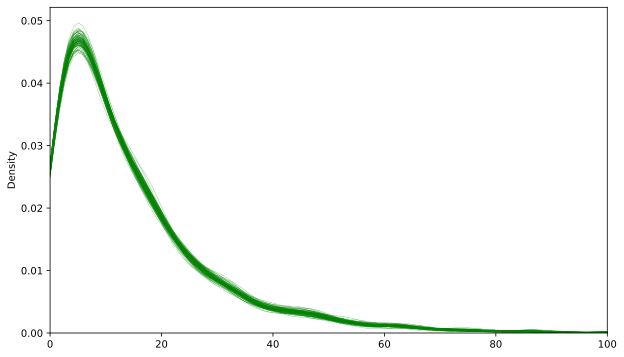

In [7]:
fig = plt.figure(figsize=(10, 6))
for i in range(100):
    sns.kdeplot(duration_bootstrap.sample(),
                alpha=0.01, lw=0.2, cut=0,
                color="green")
plt.xlim(0, 100)
plt.show()